In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from typing import Set

In [50]:
connection_matrix = np.array([
    [0,1,0,1,0,0,0],
    [1,0,1,0,0,0,0],
    [0,0,0,0,1,1,0],
    [0,1,1,0,0,0,0],
    [0,0,0,0,0,0,1],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0]
])

In [51]:
graph = nx.from_numpy_array(connection_matrix, create_using=nx.DiGraph)
names = {i:chr(ord('A')+i ) for i in graph.nodes}
graph = nx.relabel_nodes(graph, names)

In [52]:
def draw_graph(graph: nx.Graph):
        """Function that draws this specific graph
         -"""
        fig, ax = plt.subplots()
        layout = nx.kamada_kawai_layout(graph)
        node_colors = ['lightblue']*7
        nx.draw_networkx_nodes(graph, pos= layout, node_color=node_colors, ax = ax) 
        nx.draw_networkx_labels(graph, pos =layout,font_color='black', ax = ax)
        nx.draw_networkx_edges(graph, layout, edge_color='black', ax = ax)

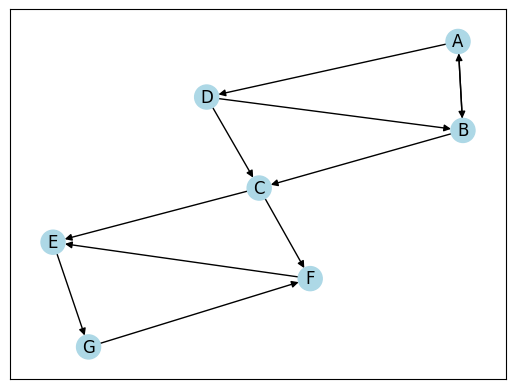

In [53]:
draw_graph(graph)

In [18]:
list(nx.strongly_connected_components(graph))

[{'E', 'F', 'G'}, {'C'}, {'A', 'B'}, {'D'}]

In [65]:
def find_champions(graph: nx.graph):
    champions = []

    def traverse(graph: nx.graph,start_node: str):
        nonlocal nodes_left
        nonlocal champions  
        for child in graph.successors(start_node):
            if child in champions: # if we can reach a champion, then we have a new another champion
                champions.append(start_node)
                return
            if child in nodes_left:
                nodes_left -= set(child)
                traverse(graph, child)
    
    for node in graph:
        nodes_left = set(graph.nodes).difference(node)
        traverse(graph,node)
        # print(node, nodes_left)
        if len(nodes_left) == 0:
            champions.append(node)
    
    print(champions)

    

In [66]:
find_champions(graph)

['A', 'B', 'D']


In [68]:

%%markdown

find groups that have defeated each other. 
This simply become the task of finding strongly connected components. 
Using networkx this task becomes simple:



find groups that have defeated each other. 
This simply become the task of finding strongly connected components. 
Using networkx this task becomes simple:


In [67]:
list(nx.strongly_connected_components(graph))

[{'E', 'F', 'G'}, {'C'}, {'A', 'B', 'D'}]

In [75]:
%%markdown

the running time for this is then simply $O(V + E)$
from the definition of the SCC algorithm 
(unless nx uses some faster algorithm)


the running time for this is then simply $O(V + E)$
from the definition of the SCC algorithm 
(unless nx uses some faster algorithm)
